In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('random_Forest.csv')
df.head(10)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-9,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   gender               777715 non-null  object 
 2   has_car              777715 non-null  object 
 3   has_home             777715 non-null  object 
 4   no_of_children       777715 non-null  int64  
 5   total_income         777715 non-null  float64
 6   income_status        777715 non-null  object 
 7   highest_education    777715 non-null  object 
 8   relationship_status  777715 non-null  object 
 9   house_type           777715 non-null  object 
 10  dob_count            777715 non-null  int64  
 11  days_employed_Count  777715 non-null  int64  
 12  has_mobile           777715 non-null  int64  
 13  has_work_phone       777715 non-null  int64  
 14  has_Any_phone        777715 non-null  int64  
 15  email_given      

In [4]:
df['job_type'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [5]:
df['income_status'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

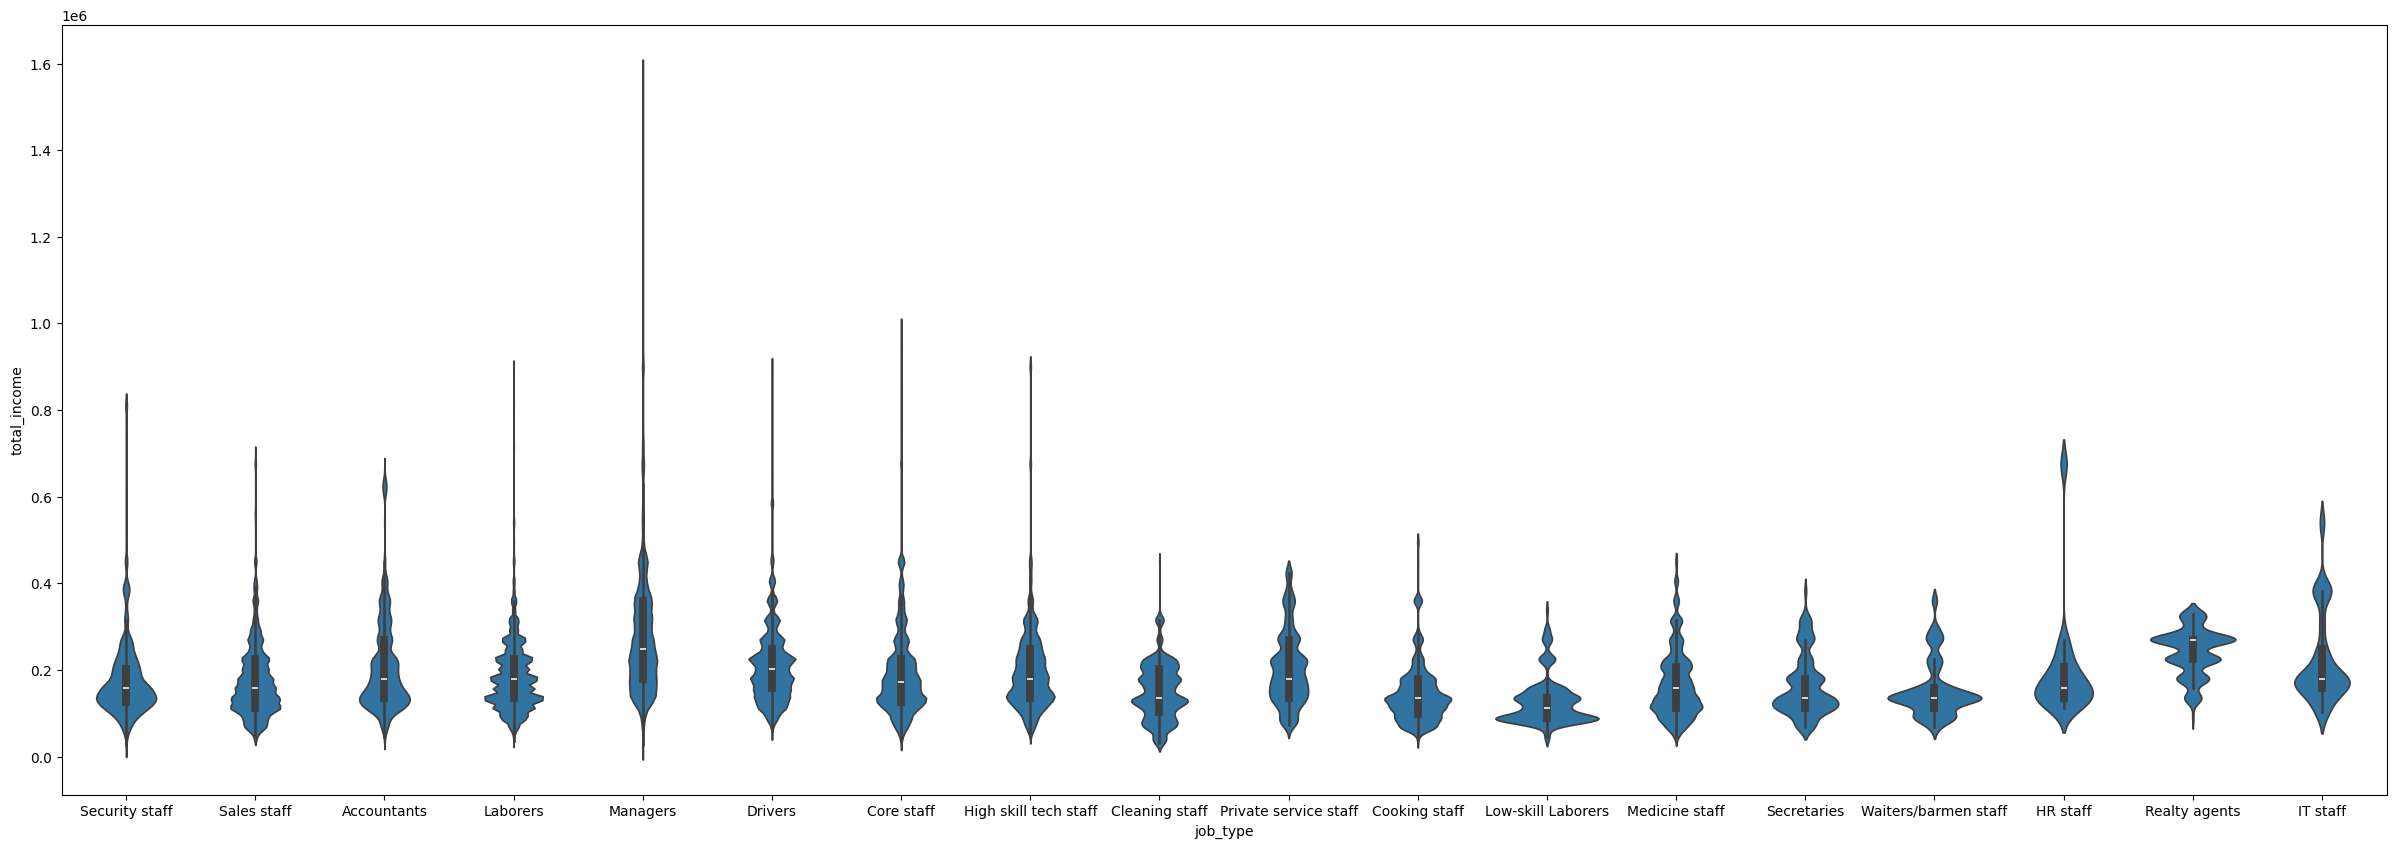

In [6]:
plt.subplots(figsize=(30, 10))
sns.violinplot(x=df['job_type'], y=df['total_income'])
plt.show()
#Will definetly have to remove outlier based on their job type

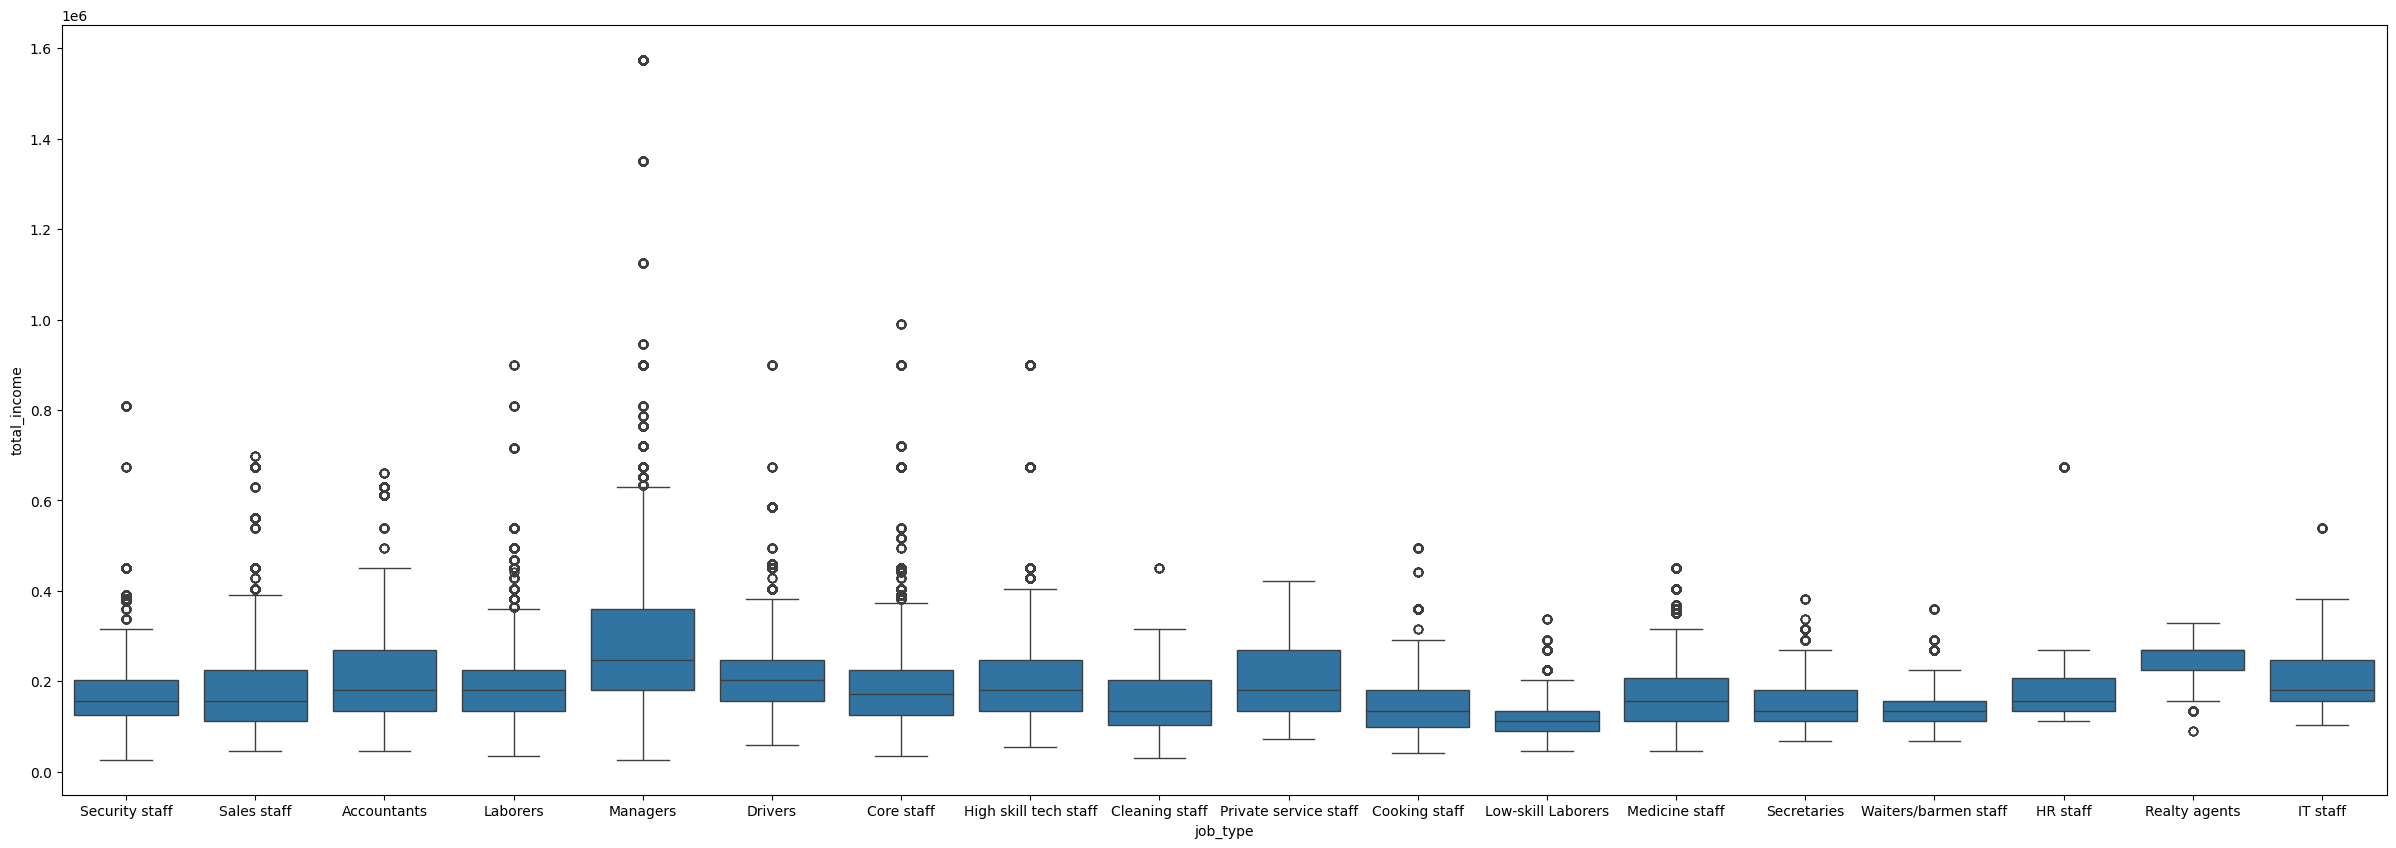

In [7]:
plt.subplots(figsize=(30, 10))
sns.boxplot(x=df['job_type'], y=df['total_income'])
plt.show()

In [8]:
jobs = df['job_type'].unique().tolist()
jobs.pop(0)
jobs

['Security staff',
 'Sales staff',
 'Accountants',
 'Laborers',
 'Managers',
 'Drivers',
 'Core staff',
 'High skill tech staff',
 'Cleaning staff',
 'Private service staff',
 'Cooking staff',
 'Low-skill Laborers',
 'Medicine staff',
 'Secretaries',
 'Waiters/barmen staff',
 'HR staff',
 'Realty agents',
 'IT staff']

In [9]:
# Loop through each unique job type in the DataFrame
for job in jobs:
    job_df = df[df['job_type'] == job]
    
    Q1 = job_df['total_income'].quantile(0.25)
    Q3 = job_df['total_income'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Identify the indices of outliers
    outliers = job_df[(job_df['total_income'] < lower) | (job_df['total_income'] > upper)].index

    df.drop(index=outliers, inplace=True)

# Reset the index of the DataFrame after dropping outliers
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760843 entries, 0 to 760842
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   760843 non-null  int64  
 1   gender               760843 non-null  object 
 2   has_car              760843 non-null  object 
 3   has_home             760843 non-null  object 
 4   no_of_children       760843 non-null  int64  
 5   total_income         760843 non-null  float64
 6   income_status        760843 non-null  object 
 7   highest_education    760843 non-null  object 
 8   relationship_status  760843 non-null  object 
 9   house_type           760843 non-null  object 
 10  dob_count            760843 non-null  int64  
 11  days_employed_Count  760843 non-null  int64  
 12  has_mobile           760843 non-null  int64  
 13  has_work_phone       760843 non-null  int64  
 14  has_Any_phone        760843 non-null  int64  
 15  email_given      

In [10]:
from sklearn.preprocessing import LabelEncoder
df['job_type_encoded'] = LabelEncoder().fit_transform(df['job_type'].astype(str))

# Check correlation with job_type_encoded
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['job_type_encoded'].sort_values(ascending=False))
df.drop(columns=['job_type_encoded'])


job_type_encoded       1.000000
days_employed_Count    0.533938
record_month_count    -0.002942
has_Any_phone         -0.005317
ID                    -0.009323
email_given           -0.041559
total_income          -0.070497
family_size           -0.132040
no_of_children        -0.138623
has_work_phone        -0.155958
dob_count             -0.323596
has_mobile                  NaN
Name: job_type_encoded, dtype: float64


,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760838,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-9,0
760839,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-10,2
760840,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-11,1
760841,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-12,0


In [11]:
from sklearn.impute import KNNImputer
label_encoder = LabelEncoder()


if df['job_type'].isnull().any():
    df['job_type_encoded'] = label_encoder.fit_transform(df['job_type'].astype(str))
else:
    print("No missing values in 'job_type'")

impute_columns = ['job_type_encoded', 'days_employed_Count', 'dob_count', 'has_work_phone','no_of_children']
impute_data = df[impute_columns]


imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_data)

imputed_df = pd.DataFrame(imputed_array, columns=impute_columns)
df['job_type_encoded'] = imputed_df['job_type_encoded']
df['job_type'] = label_encoder.inverse_transform(df['job_type_encoded'].round().astype(int))

df = df.drop(columns=['job_type_encoded'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760843 entries, 0 to 760842
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   760843 non-null  int64  
 1   gender               760843 non-null  object 
 2   has_car              760843 non-null  object 
 3   has_home             760843 non-null  object 
 4   no_of_children       760843 non-null  int64  
 5   total_income         760843 non-null  float64
 6   income_status        760843 non-null  object 
 7   highest_education    760843 non-null  object 
 8   relationship_status  760843 non-null  object 
 9   house_type           760843 non-null  object 
 10  dob_count            760843 non-null  int64  
 11  days_employed_Count  760843 non-null  int64  
 12  has_mobile           760843 non-null  int64  
 13  has_work_phone       760843 non-null  int64  
 14  has_Any_phone        760843 non-null  int64  
 15  email_given      

In [13]:
df.drop(columns=['ID'], inplace=True)
df.dropna(inplace=True,axis=0)

In [14]:
X = df.drop(columns=['def_status'])
Y = df['def_status']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=100)

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
Y_train = lbl_encoder.fit_transform(Y_train)
Y_test = lbl_encoder.transform(Y_test)

In [17]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X_train[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

X_train_encoded = pd.concat([X_train.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)

X_train_encoded = X_train_encoded.drop(categorical_columns, axis=1)

In [18]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608674 entries, 0 to 608673
Data columns (total 56 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   no_of_children                                   608674 non-null  int64  
 1   total_income                                     608674 non-null  float64
 2   dob_count                                        608674 non-null  int64  
 3   days_employed_Count                              608674 non-null  int64  
 4   has_mobile                                       608674 non-null  int64  
 5   has_work_phone                                   608674 non-null  int64  
 6   has_Any_phone                                    608674 non-null  int64  
 7   email_given                                      608674 non-null  int64  
 8   family_size                                      608674 non-null  int64  
 9   record_month_co

In [19]:
one_hot_encoded = encoder.transform(X_test[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

X_test_encoded = pd.concat([X_test.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)

X_test_encoded = X_test_encoded.drop(categorical_columns, axis=1)

In [20]:
from imblearn.over_sampling import RandomOverSampler

OverS = RandomOverSampler(random_state=42)

X_Over, Y_Over = OverS.fit_resample(X_train_encoded, Y_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) 
clf.fit(X_Over, Y_Over)

RandomForestClassifier()

In [22]:
predict = clf.predict(X_test_encoded)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(
    f'''
    Confusion Matrix:\n {confusion_matrix(predict,Y_test)}\n
    Classification Reprt:\n {classification_report(predict, Y_test)}
    Accuracy Score: \n {accuracy_score(predict,Y_test)}
     '''
)


    Confusion Matrix:
 [[31831   672    31     7     4    40 13056  6467]
 [ 1310   349    41     6     3     6  1374   439]
 [   72    23    20    23     3    11   119    37]
 [   28     6     7     5    18     3    36    14]
 [   15     1     3     3     6    11    33    10]
 [   92    13     6     2     3   156   129    41]
 [13385   378    42    14     7    51 40032  5350]
 [ 9846   210    28     3     3    16  9977 16242]]

    Classification Reprt:
               precision    recall  f1-score   support

           0       0.56      0.61      0.59     52108
           1       0.21      0.10      0.13      3528
           2       0.11      0.06      0.08       308
           3       0.08      0.04      0.06       117
           4       0.13      0.07      0.09        82
           5       0.53      0.35      0.42       442
           6       0.62      0.68      0.65     59259
           7       0.57      0.45      0.50     36325

    accuracy                           0.58    1521